In [1]:
import sympy as sp
import jax.numpy as np
import matplotlib.pyplot as plt

In [2]:
from eq3 import config
from main import run

In [3]:
network, best = run(config)

21:28:41.247 [INFO] Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
21:28:41.247 [INFO] Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
21:28:41.248 [INFO] Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
21:28:41.640 [INFO] Constructed symbolic model
21:28:45.490 [INFO] Constructed loss equation
21:28:52.872 [INFO] Constructed JAXified model
21:28:58.789 [INFO] Epoch: 1, Loss: 29423.630859375
21:28:58.980 [INFO] Epoch: 10, Loss: 3631.33056640625
21:28:59.181 [INFO] Epoch: 20, Loss: 1966.939208984375
21:28:59.372 [INFO] Epoch: 30, Loss: 1487.55615234375
21:28:59.559 [INFO] Epoch: 40, Loss: 1243.038330078125
21:28:59.761 [INFO] Epoch: 50, Loss: 1035.30615234375
21:28:59.985 [INFO] Epoch: 60, Loss: 881.9661865234375
21:29:00.194 [INFO] Epoch: 70, Loss: 766.2696533203125
21:29:00.396 [INFO] Epoch: 80, 

Nothing more to prune!


$\displaystyle 0.70503588093873 e^{x} + 0.981836199760437 e^{0.795534943049375 x + 0.141641315779637 e^{x} - 0.0434188037493408 \sin{\left(0.962710022926331 x \right)} + 2.27908039093018 \sin{\left(x \right)}} - 0.116246779065234 \sin{\left(0.962710022926331 x \right)} - 0.832412660121918$

In [4]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.70503588093873*exp(x) + 0.981836199760437*exp(0.795534943049375*x + 0.141641315779637*exp(x) - 0.0434188037493408*sin(0.962710022926331*x) + 2.27908039093018*sin(x)) - 0.116246779065234*sin(0.962710022926331*x) - 0.832412660121918

In [5]:
c1 = 1
c2 = 2
x = network.symbols.x
y_pred_fn = sp.lambdify([x], y_prediction_best)
y_real_fn = sp.lambdify([x], (c1 + c2*x) * sp.exp(2 * x))

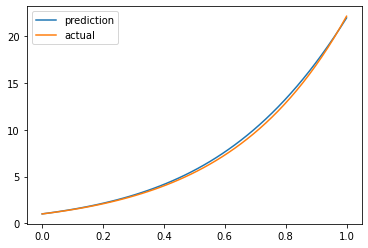

In [6]:
x = np.linspace(0, 1, 50)
plt.plot(x, y_pred_fn(x), label='prediction')
plt.plot(x, y_real_fn(x), label='actual')
plt.legend()
plt.show()

In [ ]:
y = y_prediction_best
d2ydx2 = sp.diff(y, 'x', 2)
dydx = sp.diff(y, 'x')

loss = (d2ydx2 - 4 * dydx + 5 * y)**2

sp.integrate(loss, ('x', 0, 1))